# Task-3/  K-Means Clustering
Name:E.YAMINI

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline



In [3]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


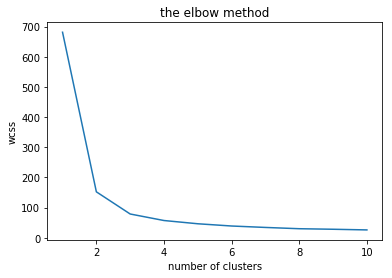

In [5]:
#Finding the optimum number of clusters for K-means classification

x=iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss') #within cluster sum of squares
plt.show()
    

THE OPTIMUM CLUSTERS IS WHERE THE ELBOW OCCURS
THIS IS WHEN WITHIN CLUSTER SUM OF SQUARES(WCSS) DOESNOT DECREASE SIGNIFICANTLY WITH EVERY ITERATION.

FROM THIS WE CAN CHOOSE THE NUMBER OF CLUSTERS AS '3'

In [7]:
#Applying kmeans to the dataset/Creating kmeans classsifier
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

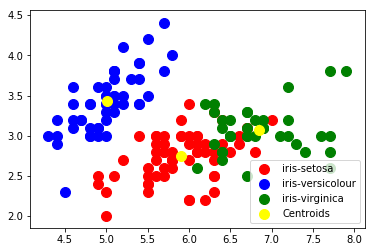

In [10]:
# Visualizing the clusters-On the first two columns
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
           s=100,c='red',label='iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
           s=100,c='blue',label='iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
           s=100,c='green',label='iris-virginica')
#Plotting the cetroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()